In [1]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from nltk import word_tokenize 

git_loc = os.path.expanduser('~/Github')

In [2]:
# to import several text files
from nltk.corpus import PlaintextCorpusReader

# refugee names
names = ['ahmed', 'hosein', 'mohad']
path = git_loc + '/Refugee_Project/Stories/' 


corpus = [] # empty list of texts
for i in range(len(names)):
    file = names[i] + '_story.txt'
    corpus_reader = PlaintextCorpusReader(path, file)
    # transform documents into texts() format - necessary to use nltk
    text = nltk.Text(corpus_reader.words())
    corpus.append(text)

In [3]:
corpus

[<Text: Ahmed ’ s Story , Syria Boglarka Balogh...>,
 <Text: Hosein ’ s Story , Greece “ I...>,
 <Text: Mohad ’ s Story , Poland I first...>]

In [4]:
# words that are repeated a lot
for i in range(len(names)):
    print('Story of', names[i], ':')
    print(corpus[i].collocations())
    print('\n')

Story of ahmed :
refugee camps; Syrian refugees
None


Story of hosein :
several hours; missing people
None


Story of mohad :

None




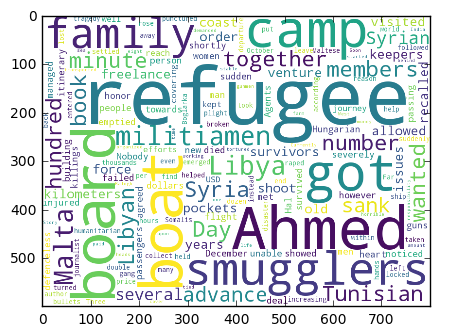

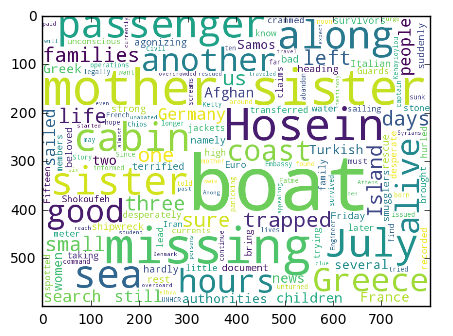

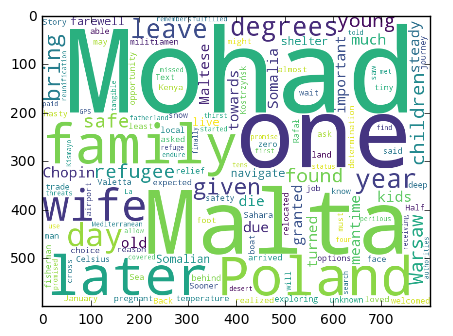

In [5]:
from wordcloud import WordCloud
from pylab import rcParams

# adjust figure size
rcParams['figure.figsize'] = 5, 5

for i in range(len(names)):
    rawtext = ' '.join(corpus[i].tokens) # Stitch it back together. 
    wordcloud = WordCloud(width=800, height=600, background_color='white')
    img = wordcloud.generate(rawtext).to_image()
    
    plt.imshow(img)
    # to be able to display all clouds of word, not only the last one
    plt.show()

In [8]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [38]:
from collections import Counter
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ["’", '“']



for story_id in range(len(names)):
    count_w = Counter()
    
    # convert corpus to strings
    text = [w for w in corpus[story_id]]
    text = ' '.join(text)
        
    for word in text:
        selection = [term for term in preprocess(text, lowercase = True) if term not in stop]
        
    count_w.update(selection)
    
    print(names[story_id], ':', count_w.most_common(20), '\n')
    

ahmed : [('refugees', 5), ('boat', 4), ('board', 4), ('ahmed', 4), ('malta', 3), ('got', 3), ('libya', 3), ('smugglers', 3), ('family', 3), ('militiamen', 3), ('refugee', 3), ('2013', 2), ('number', 2), ('members', 2), ('syrian', 2), ('wanted', 2), ('book', 2), ('syria', 2), ('camps', 2), ('advance', 2)] 

hosein : [('boat', 8), ('mother', 6), ('sister', 6), ('missing', 5), ('hosein', 4), ('along', 3), ('july', 3), ('cabin', 3), ('another', 2), ('turkish', 2), ('coast', 2), ('alive', 2), ('three', 2), ('life', 2), ('island', 2), ('women', 2), ('greece', 2), ('days', 2), ('people', 2), ('sailed', 2)] 

mohad : [('mohad', 9), ('malta', 5), ('”', 5), ('one', 5), ('family', 4), ('later', 4), ('poland', 4), ('would', 3), ('wife', 3), ('warsaw', 2), ('given', 2), ('bring', 2), ('leave', 2), ('found', 2), ('safe', 2), ('children', 2), ('young', 2), ('degrees', 2), ('day', 2), ('kids', 1)] 

